# Perkenalan

Muhammad Bintang Ramadhan  
Data Science Batch 08

Tentang Dataset  
  
Terdapat dataset mengenai penyakit kardiovaskular (CVDs), penyakit ini mengambil sekitar 17,9 juta jiwa setiap tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh CVDs dan dalam daset ini terdapat 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku kurang baik seperti merokok, obesitas, kurangnya aktivitas fisik dan penggunaan alkohol.  
  
Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

Problem  
-   Diminta untuk memprediksi 5 data pasien penderita kardiovaskular dengan data-data tersebut apakah pasien akan bertahan hidup atau tidak bertahan hidup, prediksi dibutuhkan karena jika terprediksi tidak bertahan hidup maka akan dilakukan penanganan khusus untuk mengatur pola hidup pasien tersebut agar dapat bertahan hidup.

Objective  
-   Saya akan membuat machine learning menggunakan model RandomForestClassifier dan XGBClassifier, dan memilih yang terbaik untuk dapat memprediksi kasus tersebut.

# Import Pustaka

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split Data
from sklearn.model_selection import train_test_split

# Data Preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# evaluation model score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import Data

In [3]:
#Membuka data dengan melihat seluruh column
df_ori = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df_ori.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


-   Dalam dataset ini terdapat 13 kolom dan 299 baris/data
-   Terdapat tipe data float 3 kolom dan integer 10 kolom
-   Tidak terdapat Missing Value

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Visualization

In [66]:
#Pisahkan data numerical dan categorical

df_num=df.drop(columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT'])
df_cat=df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]

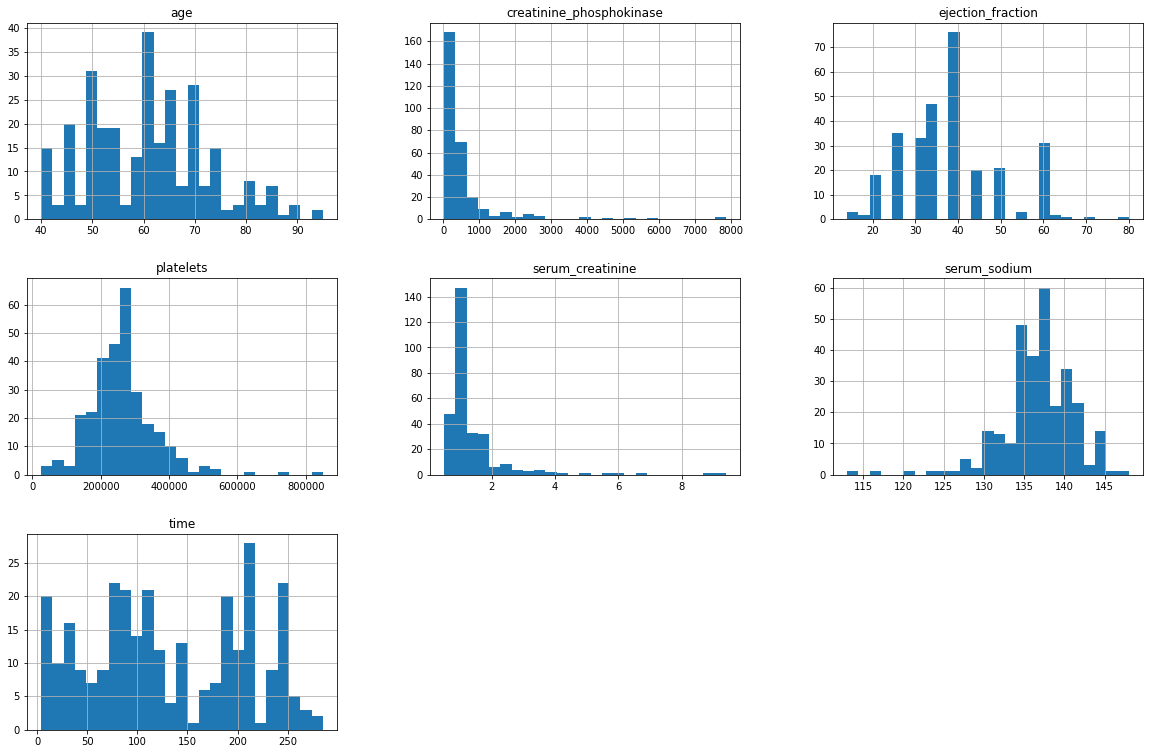

In [73]:
df_num.hist(bins=25, figsize=(20,13))
plt.show()

-   Kebanyakan distribusi data cenderung Normal walaupun ada beberapa yang terlihat skewness
-   Untuk memastikan skewness atau tidak nanti akan saya lakukan pengecekan distribusi data sekaligus pengecekan outliers

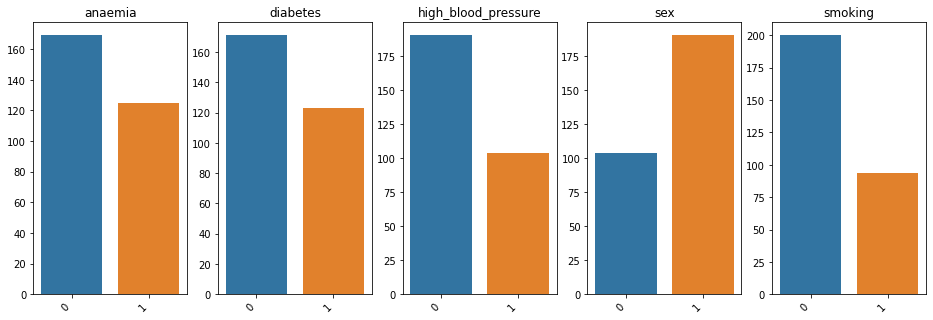

In [70]:
fig,axes=plt.subplots(ncols=5,figsize=(16,5))

for i,col in enumerate(df_cat.columns):
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts().values, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_title(col)

-   Pasien yang tidak menderita anaemia lebih banyak daripada yang menderita anaemia.
-   Pasien yang tidak menderita diabetes lebih banyak daripada yang menderita diabetes.
-   Pasien yang tidak menderita hipertensi tinggi lebih banyak daripada yang menderita hipertensi tinggi.
-   Lebih banyak pasien Pria daripada Wanita.
-   Pasien lebih banyak yang tidak merokok.

Text(0.5, 0.98, 'Survive or dead by Gender')

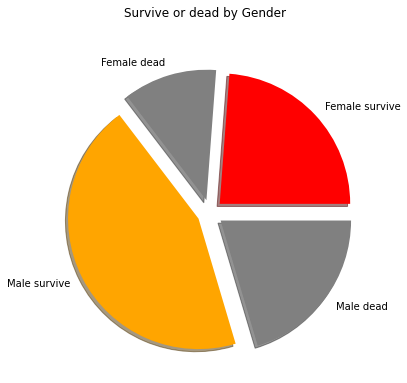

In [119]:
f_dead=df.age[(df.sex==0) & (df.DEATH_EVENT==1)].count()/len(df)*100
m_dead=df.age[(df.sex==1) & (df.DEATH_EVENT==1)].count()/len(df)*100
f_survive=df.age[(df.sex==0) & (df.DEATH_EVENT==0)].count()/len(df)*100
m_survive=df.age[(df.sex==1) & (df.DEATH_EVENT==0)].count()/len(df)*100


data=[f_survive,f_dead,m_survive,m_dead]
label=["Female survive","Female dead","Male survive","Male dead"]
explde=[0.1,0.1,0.1,0.1]
colors = ['red', 'grey', 'orange', 'gray']
plt.figure(figsize=(6,6))
plt.pie(x=data,labels=label,shadow=True,explode=explde, colors=colors)
plt.suptitle("Survive or dead by Gender")

Pria lebih banyak yang menderita kardiovaskular dari wanita dan Pria lebih banyak yang tidak bertahan hidup dari wanita.

-   

# Data Preprocessing

## Get Data Inference

In [7]:
inf = df.sample(5, random_state=8) #Mengambil 5 data random untuk dijadikan data inference / untuk diprediksi
inf.drop(columns='DEATH_EVENT', inplace=True) #drop target, karna data akan dijadikan bahan prediksi target
inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280
107,45.0,1,1876,1,35,0,226000.0,0.9,138,1,0,88
154,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120
181,59.0,1,176,1,25,0,221000.0,1.0,136,1,1,150
55,95.0,1,371,0,30,0,461000.0,2.0,132,1,0,50


In [8]:
#Menghapus data Inference dari dalam dataset
df = df.drop(inf.index)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0


In [9]:
# reset Index untuk dataframe dan data inference
df.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)

## feature Selection

Text(0.5, 1.0, 'Heatmap Korelasi')

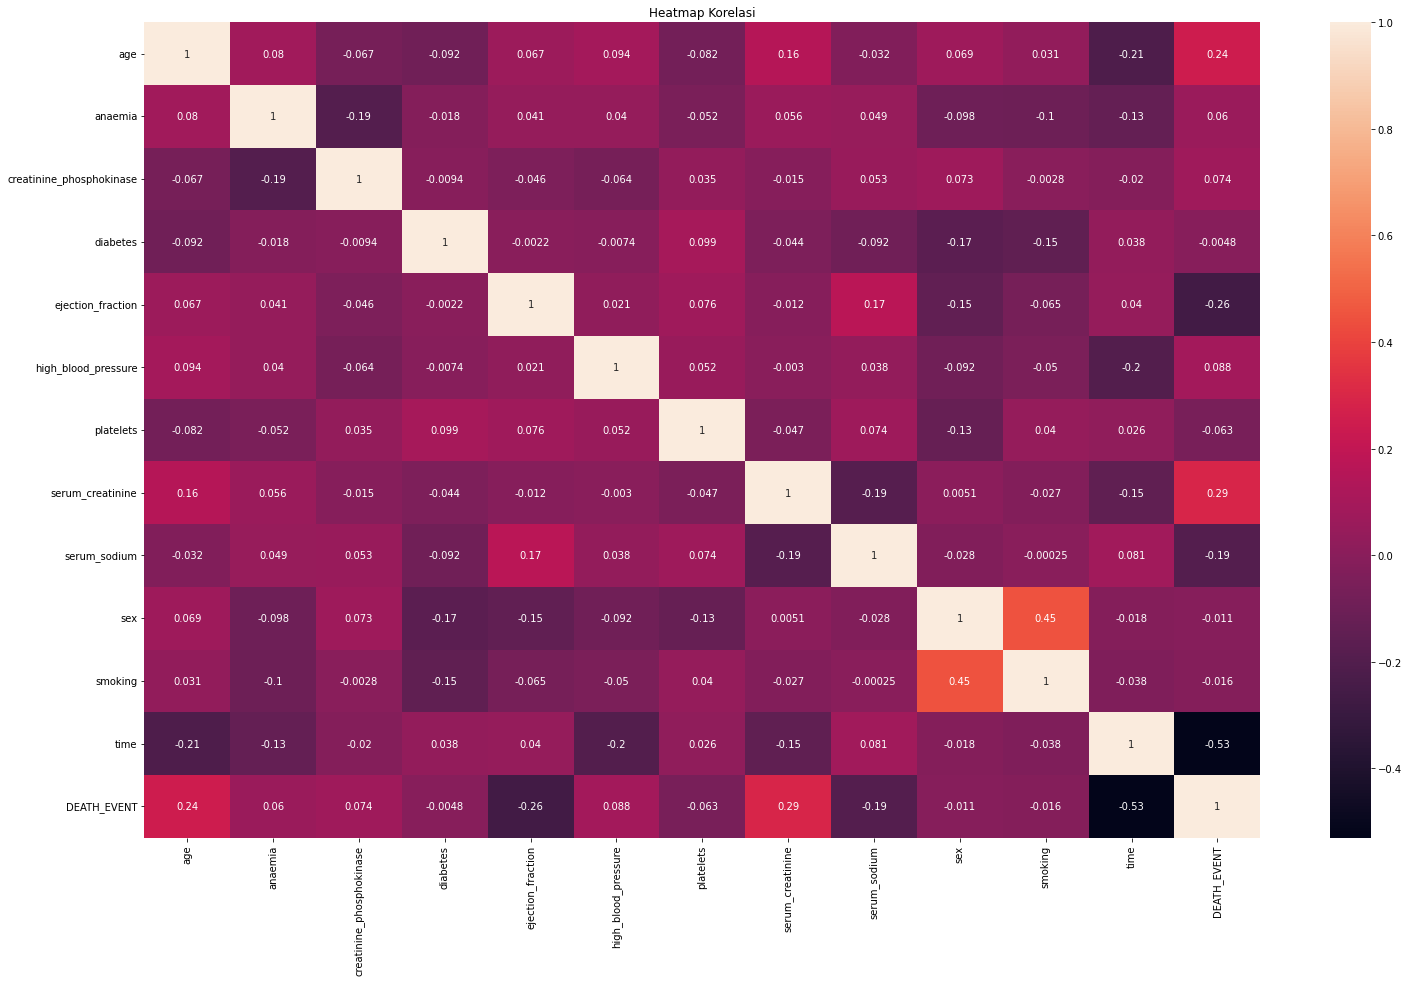

In [10]:
plt.figure(figsize=(25,15)) #ukuran plot korelasi
sns.heatmap(df.corr(), annot=True) #Menampilkan korelasi dari dataframe
plt.title('Heatmap Korelasi') #Title plot

-   Memang tidak semuanya memiliki high correlation terhadap target, tapi menurut saya dan telah dijelaskan ke 12 fitur ini mempengaruhi bertahan hidup atau tidak bertahan hidup seseorang penderita kardiovaskular ini. Jadi tidak akan ada kolom yang saya drop.

## Train Test Split

In [12]:
# Splitting Dataset menggunakan sklearn train_test_split
# Membagi untuk data train 80% dan validation 20%
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=8, stratify=df.DEATH_EVENT)

print(train.shape)
print(test.shape)

(235, 13)
(59, 13)


## Handling Outliers

### Identify Outliers

In [13]:
#Function histplot dan boxplot untuk melihat distribusi data
def identify_plots(df, variable):
    plt.figure(figsize=(16,4)) #Ukuran plotting

    #Plot 1 Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    #Plot 2 Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

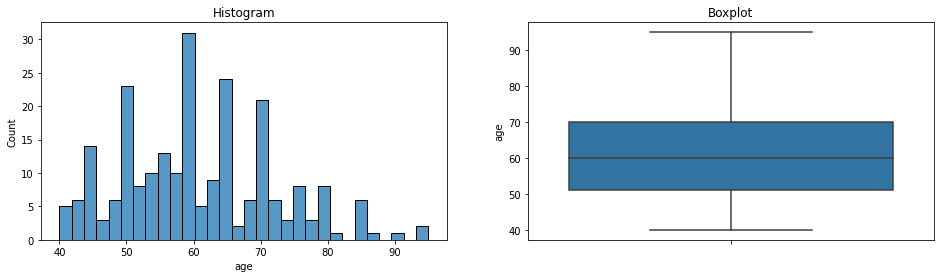

Nilai Skew : 0.40699759558094406



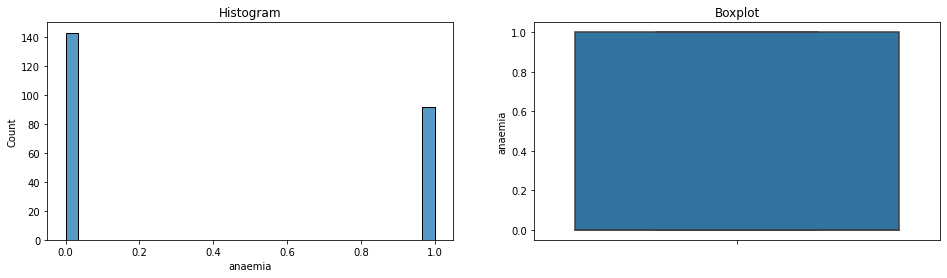

Nilai Skew : 0.44750117760778235



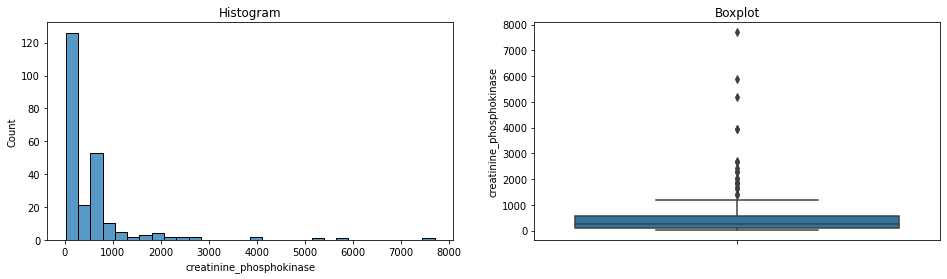

Nilai Skew : 4.5456916641101985



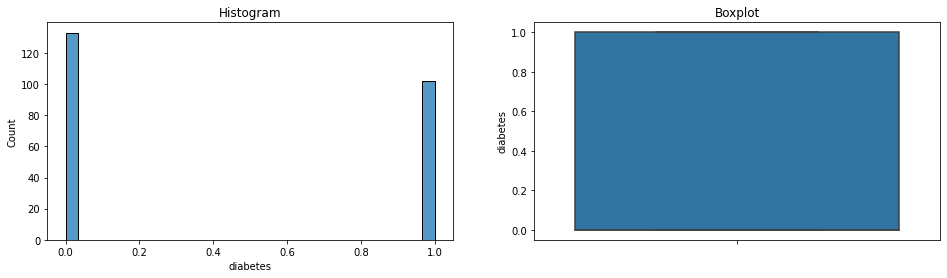

Nilai Skew : 0.2678685496759922



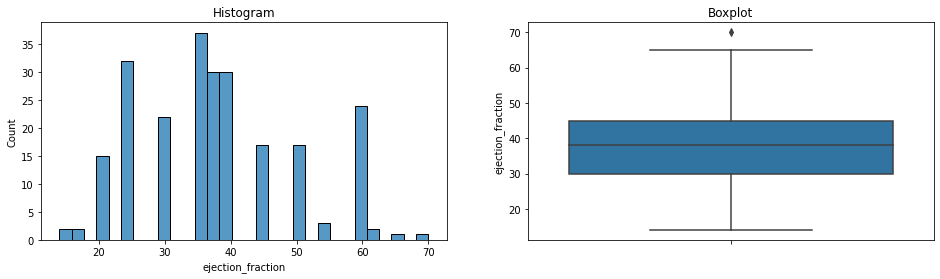

Nilai Skew : 0.43753959271696446



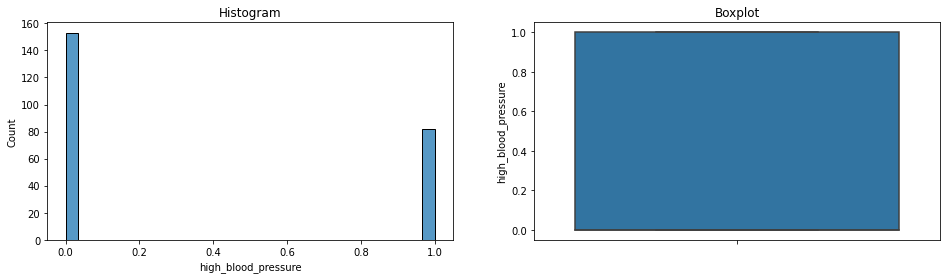

Nilai Skew : 0.6379573508292538



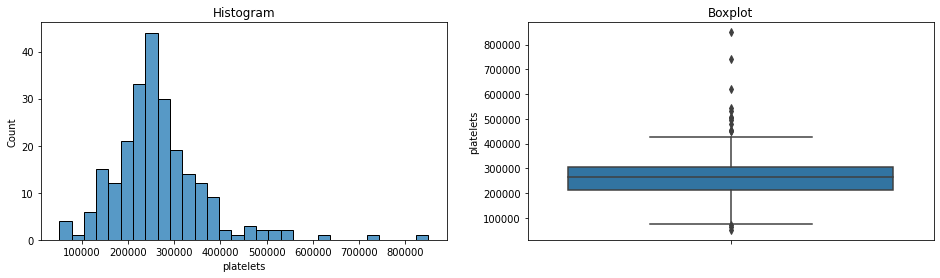

Nilai Skew : 1.7160260555827103



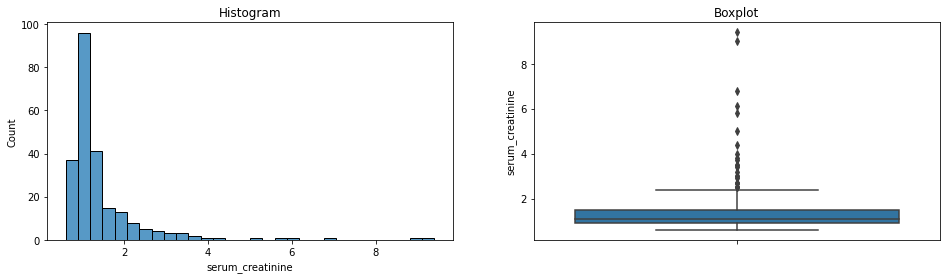

Nilai Skew : 4.0337399650261725



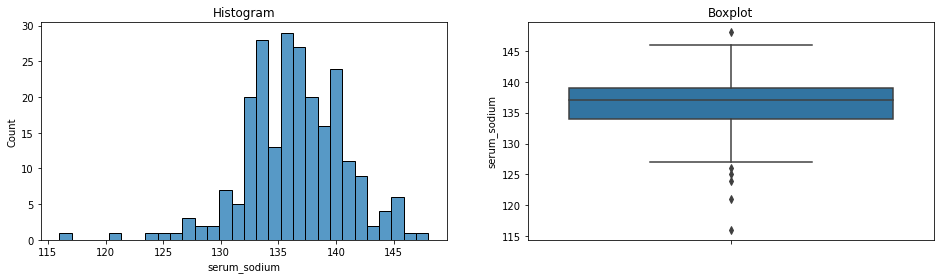

Nilai Skew : -0.6995912907869702



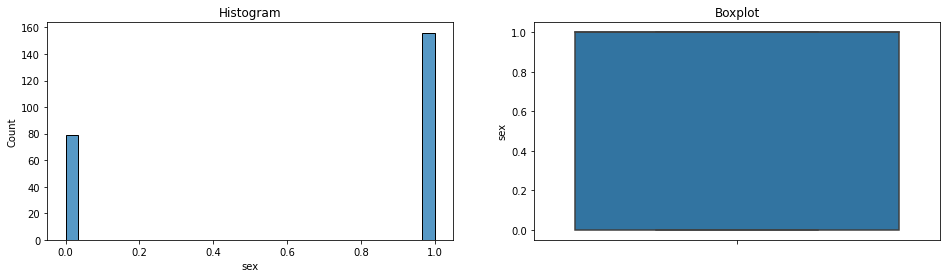

Nilai Skew : -0.698072965334923



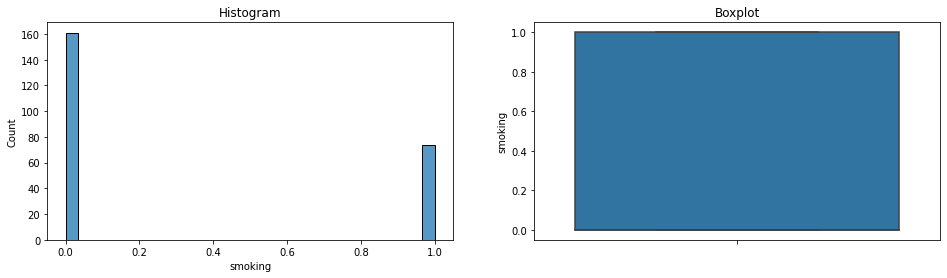

Nilai Skew : 0.8021884294648517



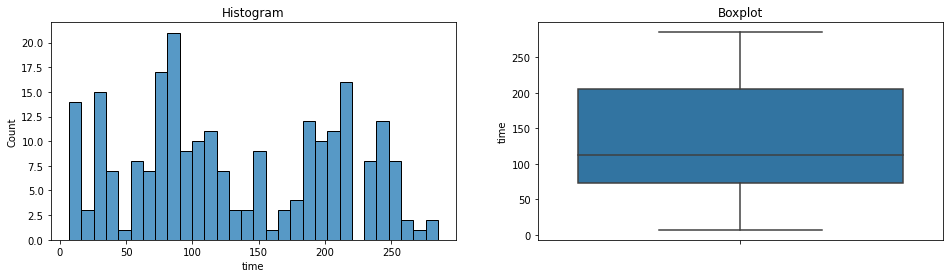

Nilai Skew : 0.15220221653281782



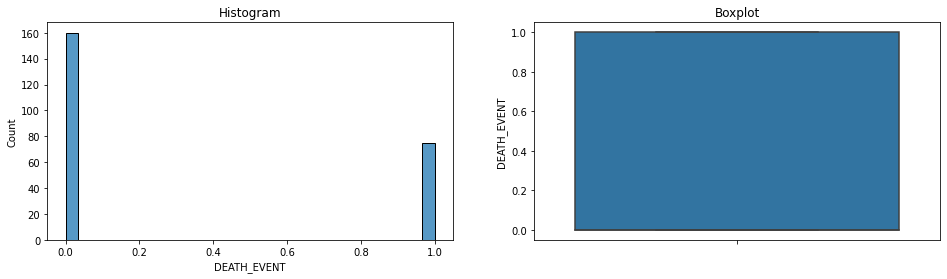

Nilai Skew : 0.7809338383826824



In [14]:
for var in train.select_dtypes(np.number): #Looping semua data numerik 
    identify_plots(train, var)
    print('Nilai Skew :', train[var].skew()) # Nilai skewness dari tiap fitur numerik
    print()

### Outliers Detection

In [15]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan mean +- 3 * standard deviasi.
def find_normal_boundaries(df, variable):
    upper_boundary_normal = df[variable].mean() + 3 * df[variable].std() # batas atas normal
    lower_boundary_normal = df[variable].mean() - 3 * df[variable].std() # batas bawah normal

    return upper_boundary_normal, lower_boundary_normal

In [16]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #IQR = Q3 - Q1

    lower_boundary_skew = df[variable].quantile(0.25) - (IQR * distance) #batas bawah skew
    upper_boundary_skew = df[variable].quantile(0.75) + (IQR * distance) #batas atas skew

    return upper_boundary_skew, lower_boundary_skew

#### Outliers Detection for Normal Distribution

Age

In [17]:
# Melihat batas atas dan batas bawah variable age
age_upper_boundary_normal, age_lower_boundary_normal = find_normal_boundaries(train, 'age')
age_upper_boundary_normal, age_lower_boundary_normal

(95.11898129519003, 26.393078279278058)

In [18]:
# Melihat jumlah dan percent data outliers variable age
print('Jumlah data age diatas 95.11   : {}'.format(len(train[train['age'] > age_upper_boundary_normal])))
print('Jumlah data age dibawah 26.39   : {}'.format(len(train[train['age'] < age_lower_boundary_normal])))
print()
print('% Jumlah data age diatas 95.11 : {}'.format(len(train[train['age'] > age_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data age dibawah 26.39 : {}'.format(len(train[train['age'] < age_lower_boundary_normal])/len(train) * 100))

Jumlah data age diatas 95.11   : 0
Jumlah data age dibawah 26.39   : 0

% Jumlah data age diatas 95.11 : 0.0
% Jumlah data age dibawah 26.39 : 0.0


-   Tidak terdapat data Outliers pada fitur age

Anaemia

In [19]:
# Melihat batas atas dan batas bawah variable anaemia
anaemia_upper_boundary_normal, anaemia_lower_boundary_normal = find_normal_boundaries(train, 'anaemia')
anaemia_upper_boundary_normal, anaemia_lower_boundary_normal

(1.8588650768349977, -1.0758863534307426)

In [20]:
# Melihat jumlah dan percent data outliers variable anaemia
print('Jumlah data anaemia diatas 1.8   : {}'.format(len(train[train['anaemia'] > anaemia_upper_boundary_normal])))
print('Jumlah data anaemia dibawah -1   : {}'.format(len(train[train['anaemia'] < anaemia_lower_boundary_normal])))
print()
print('% Jumlah data anaemia diatas 1.8 : {}'.format(len(train[train['anaemia'] > anaemia_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data anaemia dibawah -1 : {}'.format(len(train[train['anaemia'] < anaemia_lower_boundary_normal])/len(train) * 100))

Jumlah data anaemia diatas 1.8   : 0
Jumlah data anaemia dibawah -1   : 0

% Jumlah data anaemia diatas 1.8 : 0.0
% Jumlah data anaemia dibawah -1 : 0.0


-   Tidat terdapat data Outliers pada fitur anaemia

Diabetes

In [21]:
# Melihat batas atas dan batas bawah variable diabetes
diabetes_upper_boundary_normal, diabetes_lower_boundary_normal = find_normal_boundaries(train, 'diabetes')
diabetes_upper_boundary_normal, diabetes_lower_boundary_normal

(1.9241078534444696, -1.056022747061491)

In [22]:
# Melihat jumlah dan percent data outliers variable diabetes
print('Jumlah data diabetes diatas 1.9   : {}'.format(len(train[train['diabetes'] > diabetes_upper_boundary_normal])))
print('Jumlah data diabetes dibawah -1   : {}'.format(len(train[train['diabetes'] < diabetes_lower_boundary_normal])))
print()
print('% Jumlah data diabetes diatas 1.9 : {}'.format(len(train[train['diabetes'] > diabetes_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data diabetes dibawah -1 : {}'.format(len(train[train['diabetes'] < diabetes_lower_boundary_normal])/len(train) * 100))

Jumlah data diabetes diatas 1.9   : 0
Jumlah data diabetes dibawah -1   : 0

% Jumlah data diabetes diatas 1.9 : 0.0
% Jumlah data diabetes dibawah -1 : 0.0


-   Tidak terdapat data Outliers pada fitur diabetes

ejection_fraction

In [23]:
# Melihat batas atas dan batas bawah variable ejection_fraction
ejection_fraction_upper_boundary_normal, ejection_fraction_lower_boundary_normal = find_normal_boundaries(train, 'ejection_fraction')
ejection_fraction_upper_boundary_normal, ejection_fraction_lower_boundary_normal

(73.53969456737141, 2.5198799007136827)

In [24]:
# Melihat jumlah dan percent data outliers variable ejection_fraction
print('Jumlah data ejection_fraction diatas 73.5   : {}'.format(len(train[train['ejection_fraction'] > ejection_fraction_upper_boundary_normal])))
print('Jumlah data ejection_fraction dibawah 2.5   : {}'.format(len(train[train['ejection_fraction'] < ejection_fraction_lower_boundary_normal])))
print()
print('% Jumlah data ejection_fraction diatas 73.5 : {}'.format(len(train[train['ejection_fraction'] > ejection_fraction_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data ejection_fraction dibawah 2.5 : {}'.format(len(train[train['ejection_fraction'] < ejection_fraction_lower_boundary_normal])/len(train) * 100))

Jumlah data ejection_fraction diatas 73.5   : 0
Jumlah data ejection_fraction dibawah 2.5   : 0

% Jumlah data ejection_fraction diatas 73.5 : 0.0
% Jumlah data ejection_fraction dibawah 2.5 : 0.0


-   Tidak terdapa data Outliers pada fitur ejection_fraction

High blood pressure

In [25]:
# Melihat batas atas dan batas bawah variable high_blood_pressure
high_blood_pressure_upper_boundary_normal, high_blood_pressure_lower_boundary_normal = find_normal_boundaries(train, 'high_blood_pressure')
high_blood_pressure_upper_boundary_normal, high_blood_pressure_lower_boundary_normal

(1.7818894686432538, -1.0840171282177218)

In [26]:
# Melihat jumlah dan percent data outliers variable high_blood_pressure
print('Jumlah data high_blood_pressure diatas 1.7   : {}'.format(len(train[train['high_blood_pressure'] > high_blood_pressure_upper_boundary_normal])))
print('Jumlah data high_blood_pressure dibawah -1  : {}'.format(len(train[train['high_blood_pressure'] < high_blood_pressure_lower_boundary_normal])))
print()
print('% Jumlah data high_blood_pressure diatas 1.7 : {}'.format(len(train[train['high_blood_pressure'] > high_blood_pressure_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data high_blood_pressure dibawah -1: {}'.format(len(train[train['high_blood_pressure'] < high_blood_pressure_lower_boundary_normal])/len(train) * 100))

Jumlah data high_blood_pressure diatas 1.7   : 0
Jumlah data high_blood_pressure dibawah -1  : 0

% Jumlah data high_blood_pressure diatas 1.7 : 0.0
% Jumlah data high_blood_pressure dibawah -1: 0.0


-   Tidak terdapat data Outliers pada fitur high blood pressure

Time

In [27]:
# Melihat batas atas dan batas bawah variable time
time_upper_boundary_normal, time_lower_boundary_normal = find_normal_boundaries(train, 'time')
time_upper_boundary_normal, time_lower_boundary_normal

(359.95644999072533, -99.20751382051259)

In [28]:
# Melihat jumlah dan percent data outliers variable time
print('Jumlah data time diatas 565949   : {}'.format(len(train[train['time'] > time_upper_boundary_normal])))
print('Jumlah data time dibawah -35506  : {}'.format(len(train[train['time'] < time_lower_boundary_normal])))
print()
print('% Jumlah data time diatas 565949 : {}'.format(len(train[train['time'] > time_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data time dibawah -35506: {}'.format(len(train[train['time'] < time_lower_boundary_normal])/len(train) * 100))

Jumlah data time diatas 565949   : 0
Jumlah data time dibawah -35506  : 0

% Jumlah data time diatas 565949 : 0.0
% Jumlah data time dibawah -35506: 0.0


-   Tidak terdapat data Outliers pada fitur time

#### Outliers Detection for Skewness(+) Distribution

Creatinine_phosphokinase

In [29]:
# Melihat batas atas dan batas bawah variable creatinine_phosphokinase
creatinine_phosphokinase_upper_boundary_skew, creatinine_phosphokinase_lower_boundary_skew = find_skewed_boundaries(train, 'creatinine_phosphokinase', 1.5)
creatinine_phosphokinase_upper_boundary_skew, creatinine_phosphokinase_lower_boundary_skew

(1286.25, -591.75)

In [30]:
# Melihat jumlah dan percent data outliers variable creatinine_phosphokinase
print('Jumlah data creatinine_phosphokinase diatas 1286   : {}'.format(len(train[train['creatinine_phosphokinase'] > creatinine_phosphokinase_upper_boundary_skew])))
print('% Jumlah data creatinine_phosphokinase diatas 1286 : {}'.format(len(train[train['creatinine_phosphokinase'] > creatinine_phosphokinase_upper_boundary_skew])/len(train) * 100))

Jumlah data creatinine_phosphokinase diatas 1286   : 20
% Jumlah data creatinine_phosphokinase diatas 1286 : 8.51063829787234


-    Terdapat 20 data Outliers atau 8% data Outliers, maka akan dilakukan Capping.

Platelets

In [31]:
# Melihat batas atas dan batas bawah variable platelets
platelets_upper_boundary_skew, platelets_lower_boundary_skew = find_skewed_boundaries(train, 'platelets', 1.5)
platelets_upper_boundary_skew, platelets_lower_boundary_skew

(443500.0, 71500.0)

In [32]:
# Melihat jumlah dan percent data outliers variable platelets
print('Jumlah data platelets diatas 443500   : {}'.format(len(train[train['platelets'] > platelets_upper_boundary_skew])))
print('% Jumlah data platelets diatas 443500 : {}'.format(len(train[train['platelets'] > platelets_upper_boundary_skew])/len(train) * 100))

Jumlah data platelets diatas 443500   : 12
% Jumlah data platelets diatas 443500 : 5.106382978723404


-   Terdapat 12 data Outliers atau sebanyak 5% Outliers, maka akan dilakukan capping.

serum_creatinine

In [33]:
# Melihat batas atas dan batas bawah variable serum_creatinine
serum_creatinine_upper_boundary_skew, serum_creatinine_lower_boundary_skew = find_skewed_boundaries(train, 'serum_creatinine', 1.5)
serum_creatinine_upper_boundary_skew, serum_creatinine_lower_boundary_skew

(2.4, 1.1102230246251565e-16)

In [34]:
# Melihat jumlah dan percent data outliers variable serum_creatinine
print('Jumlah data serum_creatinine diatas 2.4   : {}'.format(len(train[train['serum_creatinine'] > serum_creatinine_upper_boundary_skew])))
print('% Jumlah data serum_creatinine diatas 2.4 : {}'.format(len(train[train['serum_creatinine'] > serum_creatinine_upper_boundary_skew])/len(train) * 100))

Jumlah data serum_creatinine diatas 2.4   : 23
% Jumlah data serum_creatinine diatas 2.4 : 9.787234042553191


-   Terdapat 23 data Outliers atau sebanyak 9% data Outliers, maka akan dilakukan capping.

Smoking

In [35]:
# Melihat batas atas dan batas bawah variable smoking
smoking_upper_boundary_skew, smoking_lower_boundary_skew = find_skewed_boundaries(train, 'smoking', 1.5)
smoking_upper_boundary_skew, smoking_lower_boundary_skew

(2.5, -1.5)

In [36]:
# Melihat jumlah dan percent data outliers variable smoking
print('Jumlah data smoking diatas 2.5   : {}'.format(len(train[train['smoking'] > smoking_upper_boundary_skew])))
print('% Jumlah data smoking diatas 2.5 : {}'.format(len(train[train['smoking'] > smoking_upper_boundary_skew])/len(train) * 100))

Jumlah data smoking diatas 2.5   : 0
% Jumlah data smoking diatas 2.5 : 0.0


-   Tidak terdapat data Outliers pada fitur smoking.

#### Outliers Detection for Skewness(-) Distribution

Serum_sodium

In [37]:
# Melihat batas atas dan batas bawah variable serum_sodium
serum_sodium_upper_boundary_skew, serum_sodium_lower_boundary_skew = find_skewed_boundaries(train, 'serum_sodium', 1.5)
serum_sodium_upper_boundary_skew, serum_sodium_lower_boundary_skew

(146.5, 126.5)

In [38]:
# Melihat jumlah dan percent data outliers variable serum_sodium
print('Jumlah data serum_sodium dibawah 126.5   : {}'.format(len(train[train['serum_sodium'] < serum_sodium_lower_boundary_skew])))
print('% Jumlah data serum_sodium dibawah 126.5 : {}'.format(len(train[train['serum_sodium'] < serum_sodium_lower_boundary_skew])/len(train) * 100))

Jumlah data serum_sodium dibawah 126.5   : 5
% Jumlah data serum_sodium dibawah 126.5 : 2.127659574468085


-   Terdapat 5 data Outliers atau sebanyak 2% Outlier, maka akan dilakukan Trimming.

Sex

In [39]:
# Melihat batas atas dan batas bawah variable sex
sex_upper_boundary_skew, sex_lower_boundary_skew = find_skewed_boundaries(train, 'sex', 1.5)
sex_upper_boundary_skew, sex_lower_boundary_skew

(2.5, -1.5)

In [40]:
# Melihat jumlah dan percent data outliers variable sex
print('Jumlah data sex dibawah -1.5   : {}'.format(len(train[train['sex'] < sex_lower_boundary_skew])))
print('% Jumlah data sex dibawah -1.5 : {}'.format(len(train[train['sex'] < sex_lower_boundary_skew])/len(train) * 100))

Jumlah data sex dibawah -1.5   : 0
% Jumlah data sex dibawah -1.5 : 0.0


-   Tidak terdapa data Outliers pada figur sex.

Hasil dari Outliers Detection terdapat beberapa Outliers pada dataset, diantaranya berikut ini:
-   creatinine_phosphokinase 8% data, platelets 5% data dan serum_creatinine 9% data. Maka akan dilakukan handling menggunakan teknik capping.
-   serum_sodium 2%, maka akan dilakukan handling menggunakan teknik trimming

### Trimming

In [41]:
#Skew
# Menandai Outliers di variable 'serum_sodium'
outliers_serum_sodium = np.where(train['serum_sodium'] > serum_sodium_upper_boundary_skew, True,
                       np.where(train['serum_sodium'] < serum_sodium_lower_boundary_skew, True, False))

In [42]:
#Menghapus Outliers
train_trimmed = train.loc[~(outliers_serum_sodium)] 

#Melihat Jumlah Data sebelum dan sesudah dilakukan Trimming
print('Data Train - Before trimming : ', train.shape) 
print('Data Train - After trimming  : ', train_trimmed.shape)

Data Train - Before trimming :  (235, 13)
Data Train - After trimming  :  (229, 13)


### Capping

In [43]:
#Handling outliers untuk distribusi data skewness + (sisi kanan)

windsoriser = Winsorizer(capping_method='iqr',
                          tail='right',
                          fold=1.5,
                          variables=['creatinine_phosphokinase', 'platelets', 'serum_creatinine'])

windsoriser.fit(train_trimmed)

train_trimmed = windsoriser.transform(train_trimmed)

serum_sodium - Before Trimming


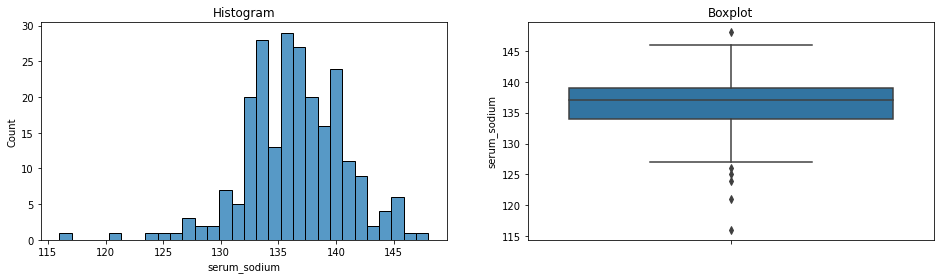


serum_sodium - After Trimming


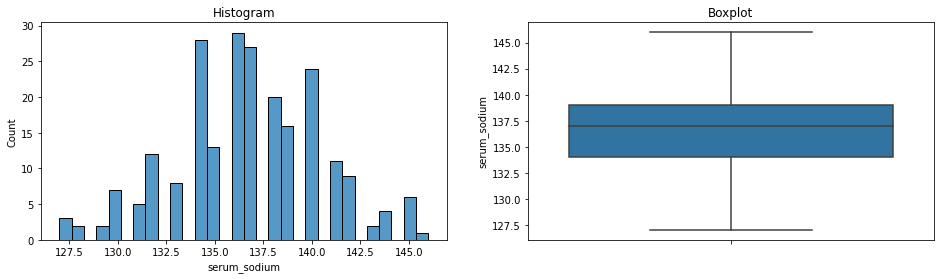

creatinine_phosphokinase - Before capping


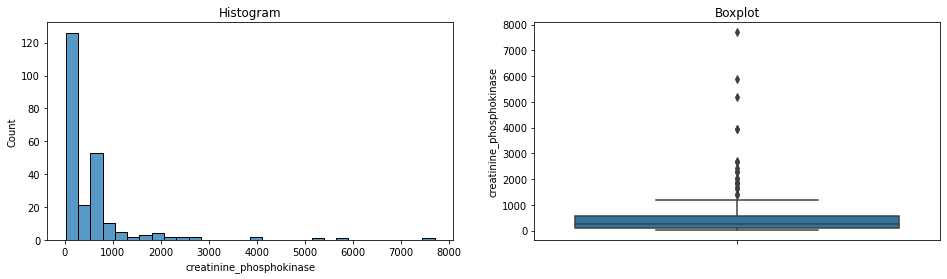


creatinine_phosphokinase - After capping


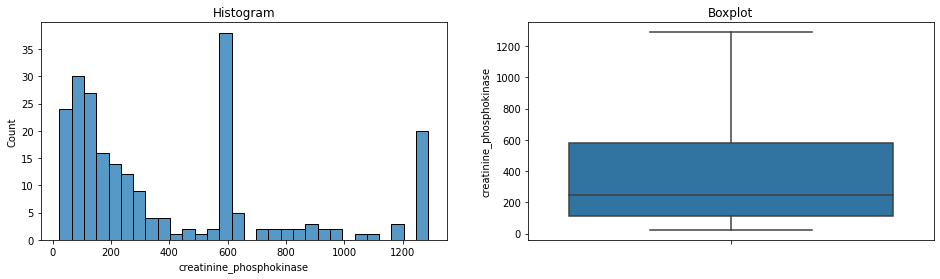

In [44]:
# Cek Sebelum Trimmed/capping dan setelah Trimmed/capping `serum_sodium` dan `creatinine_phosphokinase'

#Normal
print('serum_sodium - Before Trimming')
identify_plots(train, 'serum_sodium')
print('\nserum_sodium - After Trimming')
identify_plots(train_trimmed, 'serum_sodium')

#Skewness
print('creatinine_phosphokinase - Before capping')
identify_plots(train, 'creatinine_phosphokinase')
print('\ncreatinine_phosphokinase - After capping')
identify_plots(train_trimmed, 'creatinine_phosphokinase')

### Pipeline for Scaling

In [45]:
# Mendefinikan Target

# untuk Train data
X_train = train_trimmed.drop(columns=['DEATH_EVENT']) #Fitur
y_train = train_trimmed['DEATH_EVENT'] #Target

# untuk Test data
X_test = test.drop(columns=['DEATH_EVENT']) #Fitur
y_test = test['DEATH_EVENT'] #Target


In [46]:
# Membuat Numerical

num_col = X_train.select_dtypes(include=np.number).columns.tolist() 
num_col

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [47]:
# Pipeline untuk tipe data Numeric lalu dilakukan scalling
preprocessor = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())]
)

# Model Definition

In [48]:
#Membuat Model RandomForestClassifier
# Model RandomForestClassifier dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_rf = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestClassifier())
])

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', MinMaxScaler())])),
                ('rf', RandomForestClassifier())])

In [50]:
#Membuat Model XGBClassifier
# Model XGBClassifier dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_xgb = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBClassifier())
])

pipe_xgb.fit(X_train, y_train)

[22:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', MinMaxScaler())])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
              

# Model Evaluation

In [51]:
MLA = [pipe_rf, pipe_xgb]

In [52]:
# Predict & Evaluation score
name = []
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1score = []
test_score = []
for alg in MLA:
    name.append(alg.steps[1][1].__class__.__name__)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1score.append(f1_score(y_test, y_pred_test))

compare = pd.DataFrame({'Name': name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precission Score': precision, 'Recall Score': recall, 'F1 Score': f1score})

[22:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
compare.sort_values(by = 'Test Accuracy', ascending=False)

,Name,Train Accuracy,Test Accuracy,Precission Score,Recall Score,F1 Score
1,XGBClassifier,1.0,0.932203,0.941176,0.842105,0.888889
0,RandomForestClassifier,1.0,0.881356,0.928571,0.684211,0.787879


Dari Test Accuracy XGBClassifier memiliki score tertinggi, tetapi model disini masih overfit, maka akan saya lakukan hyperparameter tuning untuk optimasi model ini.

## Cross Validation Score

In [121]:
cv_result = cross_val_score(pipe_xgb, X_test, y_test, scoring='accuracy', cv=10)
print(cv_result.mean())

[23:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Score test accuracy XGBClassifier adalah 0.93 tetapi setelah dilakukan cross validation score accuracy-nya 0.91 

# Hyperparameter Tuning

In [57]:
#Membuat list parameter untuk diseleksi yang terbaik
param_grid = [
    {
    'xgb__n_estimators': [100, 200, 500],
    'xgb__learning_rate': [0.01,0.05,0.1],
    'xgb__booster': ['gbtree', 'gblinear'],
    'xgb__gamma': [0, 0.5, 1],
    'xgb__reg_alpha': [0, 0.5, 1],
    'xgb__reg_lambda': [0.5, 1, 5],
    'xgb__base_score': [0.2, 0.5, 1]
    }
]

In [58]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV dengan 3x cross validation
clf = GridSearchCV(pipe_xgb, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

#training GridSearchCV
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
[22:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
#melihat best parameter model
best_clf.best_params_

{'xgb__base_score': 0.5,
 'xgb__booster': 'gbtree',
 'xgb__gamma': 1,
 'xgb__learning_rate': 0.01,
 'xgb__n_estimators': 200,
 'xgb__reg_alpha': 0.5,
 'xgb__reg_lambda': 5}

In [61]:
#membuat model dengan menggunakan best parameter
best_xgb = best_clf.best_estimator_

In [62]:
#membandingkan evaluation model dari model best parameter dengan base model
ML = [pipe_xgb, best_xgb]

# Predict & Evaluation score
# Predict & Evaluation score
name = []
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1score = []
test_score = []
for alg in ML:
    name.append(alg.steps[1][1].__class__.__name__)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1score.append(f1_score(y_test, y_pred_test))

compare = pd.DataFrame({'Name': name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precission Score': precision, 'Recall Score': recall, 'F1 Score': f1score})

[22:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
compare

,Name,Train Accuracy,Test Accuracy,Precission Score,Recall Score,F1 Score
0,XGBClassifier,1.000000,0.932203,0.941176,0.842105,0.888889
1,XGBClassifier,0.886463,0.898305,0.882353,0.789474,0.833333


index 0 = base model  
index 1 = best model  
  
Dapat dilihat bahwa base model memiliki accuracy tinggi tapi overfit, sedangkan best model yang telah menggunakan best parameter memliki accuracy 0.89 dan model goodfit. Maka saya akan menggunakan best model XGBClassifier.

## Confusion Matrix

<Figure size 432x360 with 0 Axes>

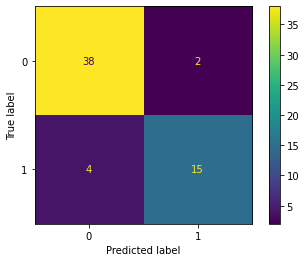

In [123]:
y_pred = best_xgb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
#Confusion metrics
plt.figure(figsize = (6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()
plt.show()

FP = 38  
FN = 2  
TP = 15  
TN = 4

Model yang cukup akurat, hanya TN dengan 4 data yang berbahaya dalam kasus ini, karena jika ia terprediksi bertahan hidup maka pihak medis tidak akan terlalu memperhatikan pola hidupnya, padahal seharusnya ia terprediksi tidak bisa bertahan hidup yang jadinya harus dapat pengawasan pola hidup extra. 

# Model Inference

In [64]:
y_pred_inf = best_xgb.predict(inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Prediction'])
y_pred_inf

,Prediction
0,0
1,0
2,0
3,0
4,1


In [122]:
#prediksi kasus
y_pred_inf = best_xgb.predict(inf)
#Jadikan sebuah dataframe
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Prediction'])

#Jika hasil prediksi 0 maka infy_pred_inf pasien bertahan hidup
y_pred_inf.loc[y_pred_inf['Prediction'] == 0, 'Prediction Model'] = 'Bertahan Hidup' 
#Jika hasil prediksi 1 maka infy_pred_inf pasien tidak akan bertahan hidup
y_pred_inf.loc[y_pred_inf['Prediction'] != 0, 'Prediction Model'] = 'Tidak Bertahan Hidup'  
 
y_pred_inf

,Prediction,Prediction Model
0,0,Bertahan Hidup
1,0,Bertahan Hidup
2,0,Bertahan Hidup
3,0,Bertahan Hidup
4,1,Tidak Bertahan Hidup


Hanya 1 pasien yang diprediksi model tidak bertahan hidup, berarti harus memiliki pengawasan extra untuk diatur pola hidupnya.

# Conclussion

Awalnya model tidak menggunakan parameter memliki score tes accuracy 0.91 tetapi overfit, setelah dilakukan hyperparameter tuning dan menggunakan best parameter model memiliki c=score test accuracy 0.89 tetapi goodfit.  
  
Jika dilihat dari Confusion Matrix  model ini cukup akurat, hanya TN dengan 4 data yang berbahaya dalam kasus ini, karena jika ia terprediksi bertahan hidup maka pihak medis tidak akan terlalu memperhatikan pola hidupnya, padahal seharusnya ia terprediksi tidak bisa bertahan hidup yang jadinya harus dapat pengawasan pola hidup extra. 